Shape: (2047256, 34)
  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   
3              0.0            Slight                 NaN  2005-01-07   
4              0.0            Slight                 NaN  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wedne

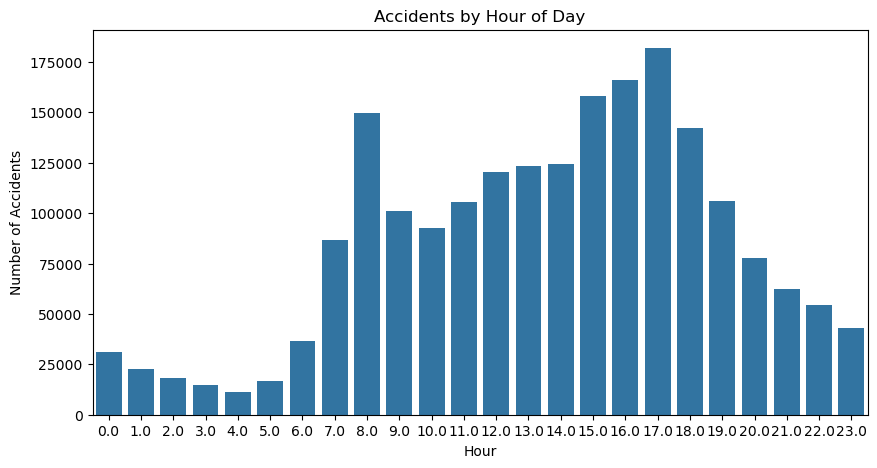

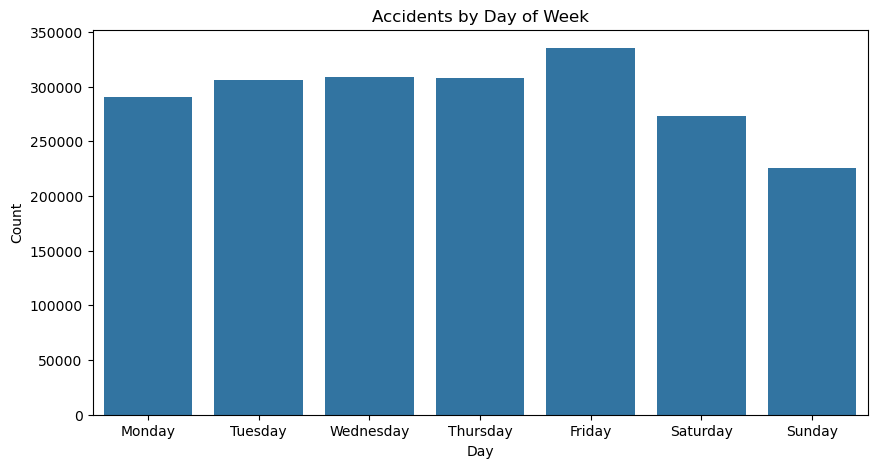

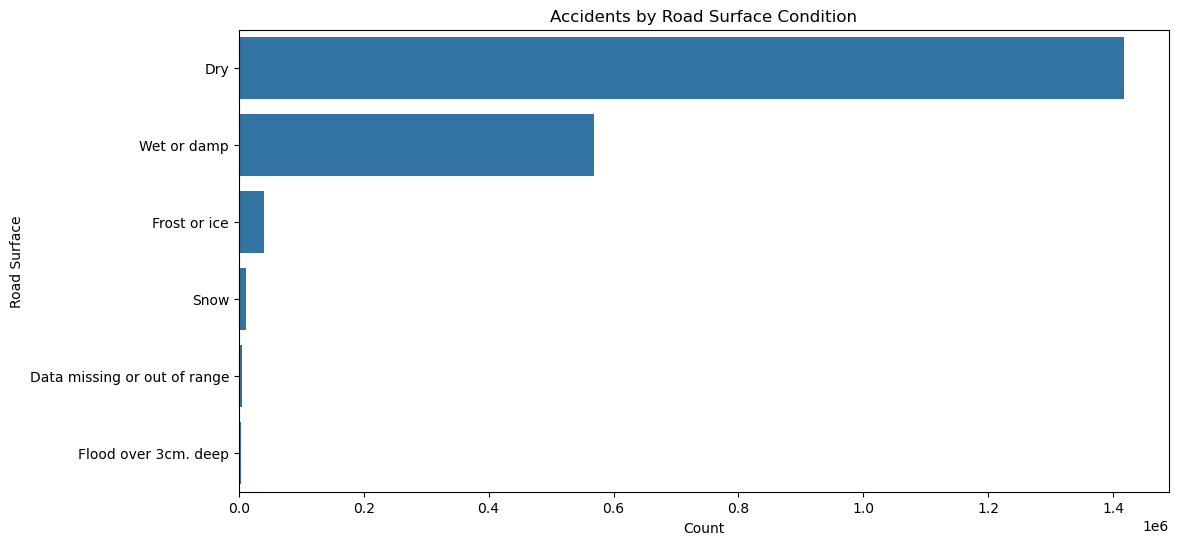

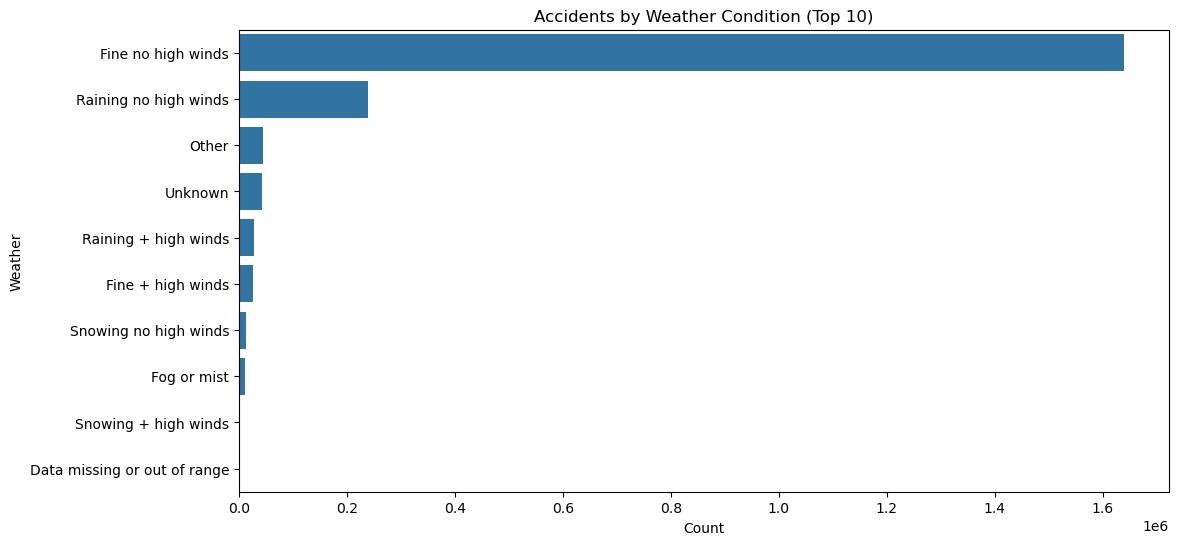

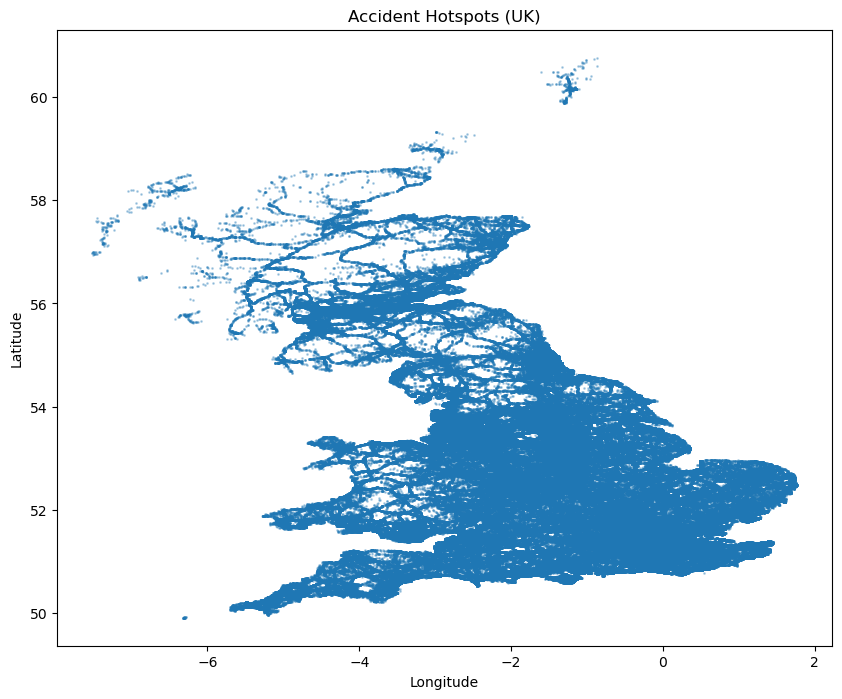

In [10]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 2. Load Dataset (fix warning)
# =========================
data = pd.read_csv(
    r"C:\Users\Lenovo\Downloads\archive\Accident_Information.csv",
    low_memory=False
)

print("Shape:", data.shape)
print(data.head())

# =========================
# 3. Data Cleaning
# =========================

# Combine Date + Time into DateTime
data["DateTime"] = pd.to_datetime(
    data["Date"] + " " + data["Time"],
    errors="coerce"
)

# Extract time features
data["Hour"] = data["DateTime"].dt.hour
data["Month"] = data["DateTime"].dt.month

# Handle missing values
data["Weather_Conditions"] = data["Weather_Conditions"].fillna("Unknown")
data["Road_Surface_Conditions"] = data["Road_Surface_Conditions"].fillna("Unknown")

# Drop rows without location (needed for hotspot map)
data = data.dropna(subset=["Latitude", "Longitude"])

# =========================
# 4. Exploratory Analysis
# =========================

# Accidents by hour of day
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=data)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

# Accidents by day of week
plt.figure(figsize=(10,5))
sns.countplot(
    x="Day_of_Week",
    data=data,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

# Road surface conditions
plt.figure(figsize=(12,6))
sns.countplot(
    y="Road_Surface_Conditions",
    data=data,
    order=data["Road_Surface_Conditions"].value_counts().index
)
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Count")
plt.ylabel("Road Surface")
plt.show()

# Weather conditions (Top 10)
plt.figure(figsize=(12,6))
sns.countplot(
    y="Weather_Conditions",
    data=data,
    order=data["Weather_Conditions"].value_counts().head(10).index
)
plt.title("Accidents by Weather Condition (Top 10)")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()

# =========================
# 5. Accident Hotspots
# =========================

plt.figure(figsize=(10,8))
plt.scatter(
    data["Longitude"],
    data["Latitude"],
    s=1,
    alpha=0.3
)
plt.title("Accident Hotspots (UK)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
